In [1]:
# M train
# average AM enters / exits

In [1]:
# import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plta

In [2]:
# dataframe with all enters/exits
csv_path = 'ts_11_2018_am_tot.csv'
am_commuters_11_2018 = pd.read_csv(csv_path, encoding="utf-8")

am_commuters_11_2018.head()

,STATION,LINENAME,AM_ENTERS,AM_EXITS
0,1 AV,L,2173.0,5427.0
1,103 ST,1,7888.0,1943.0
2,103 ST,6,8439.0,7932.0
3,103 ST,BC,4581.0,1183.0
4,103 ST-CORONA,7,22039.0,1903.0


In [3]:
# look at M line only
M_train_all = am_commuters_11_2018[am_commuters_11_2018['LINENAME'].str.contains('M')]

In [4]:
# look at all station names
M_train_all['STATION'].unique()

array(['14 ST', '34 ST-HERALD SQ', '36 ST', '4 AV-9 ST',
       '42 ST-BRYANT PK', '46 ST', '47-50 STS ROCK', '4AV-9 ST',
       '5 AV/53 ST', '5 AVE', '6 AV', '63 DR-REGO PARK', '65 ST', '67 AV',
       '74 ST-BROADWAY', 'CENTRAL AV', 'COURT SQ', 'COURT SQ-23 ST',
       'DELANCEY/ESSEX', 'ELMHURST AV', 'FLUSHING AV', 'FOREST AVE',
       'FOREST HILLS 71', 'FRESH POND RD', 'GRAND-NEWTOWN', 'HEWES ST',
       'JKSN HT-ROOSVLT', 'KNICKERBOCKER', 'LEXINGTON AV/53',
       'LORIMER ST', 'MARCY AV', 'METROPOLITAN AV', 'MYRTLE AV',
       'MYRTLE-WYCKOFF', 'NORTHERN BLVD', 'QUEENS PLAZA', 'SENECA AVE',
       'STEINWAY ST', 'W 4 ST-WASH SQ', 'WOODHAVEN BLVD'], dtype=object)

In [5]:
# check station count
M_train_all['STATION'].count()

41

In [7]:
# needs further cleaning
M_train_all["STATION"].replace("74 ST-BROADWAY", value="JKSN HT-ROOSVLT", inplace=True)
M_train_all["STATION"].replace("COURT SQ", value="COURT SQ-23 ST", inplace=True)
M_train_all["STATION"].replace("5 AVE", value="42 ST-BRYANT PK", inplace=True)

In [9]:
# now sum same name rows
M_commuters = M_train_all.groupby(['STATION'])[['AM_ENTERS','AM_EXITS']].sum()
M_commuters.head()

,AM_ENTERS,AM_EXITS
STATION,,
14 ST,5370.0,7648.0
34 ST-HERALD SQ,14027.0,21487.0
36 ST,1761.0,3554.0
4 AV-9 ST,641.0,949.0
42 ST-BRYANT PK,2663.0,21098.0


In [10]:
# order stations in excel
# save as csv
M_commuters.to_csv('M_commuters.csv')

In [11]:
# open ordered CSV
csv_path_M = 'M_commuters_order.csv'
M_commuters_order = pd.read_csv(csv_path_M, encoding="utf-8")
M_commuters_order.head()

,STATION,AM_ENTERS,AM_EXITS
0,FOREST HILLS 71,31689,4103
1,67 AV,6762,884
2,63 DR-REGO PARK,7434,783
3,WOODHAVEN BLVD,25602,2431
4,GRAND-NEWTOWN,12594,1116


In [12]:
M_commuters_order['AM_AVG_ENTER'] = M_commuters_order['AM_ENTERS']/5

In [13]:
M_commuters_order['AM_AVG_EXIT'] = M_commuters_order['AM_EXITS']/5
M_commuters_order.head()

,STATION,AM_ENTERS,AM_EXITS,AM_AVG_ENTER,AM_AVG_EXIT
0,FOREST HILLS 71,31689,4103,6337.8,820.6
1,67 AV,6762,884,1352.4,176.8
2,63 DR-REGO PARK,7434,783,1486.8,156.6
3,WOODHAVEN BLVD,25602,2431,5120.4,486.2
4,GRAND-NEWTOWN,12594,1116,2518.8,223.2


In [14]:
# order stations in excel
# save as csv
M_commuters_order.to_csv('M_commuters_final.csv')

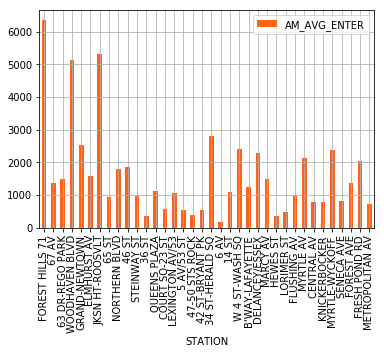

In [15]:
# graph M Train AM AVG ENTERS
plt = M_commuters_order.plot('STATION','AM_AVG_ENTER', kind='bar', color='#FF6319')
plt.grid()

# save the fig
plt.figure.savefig('M-AM-enter.pdf')

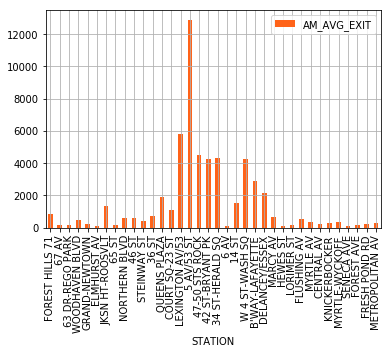

In [16]:
# graph F Train AM AVG EXITS
plt = M_commuters_order.plot('STATION','AM_AVG_EXIT', kind='bar', color='#FF6319')
plt.grid()


# save the fig
plt.figure.savefig('M-AM-exit.pdf')